In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading dataset and making Passenger id as index column

In [155]:
oo = pd.read_csv('C:/Users/HARIKRISHNAN M/Downloads/titanic_dataset.csv',index_col='PassengerId')
oo.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking the basic details of the dataset

In [156]:
oo.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
oo.shape

(891, 11)

In [158]:
oo.size

9801

In [159]:
oo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Filling in all missing values

In [160]:
oo.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

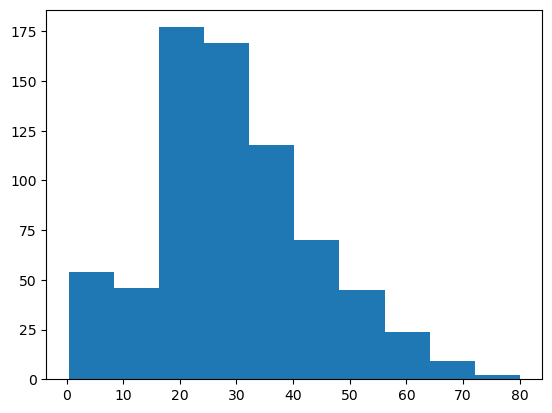

In [161]:
plt.hist(oo.Age)

In [162]:
age_median = oo.Age.median()
age_median

28.0

In [163]:
oo.Age = oo.Age.fillna(age_median)

In [164]:
oo.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [165]:
cabin_mode = oo.Cabin.mode()[0]
cabin_mode
#lets choose B96 on random basis as mode

'B96 B98'

In [166]:
cabin_mode = 'B96'

In [167]:
oo.Cabin = oo.Cabin.fillna(cabin_mode)

In [168]:
oo.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [169]:
embark_mode = oo.Embarked.mode()[0]
embark_mode

'S'

In [170]:
oo.Embarked = oo.Embarked.fillna(embark_mode)

In [171]:
oo.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Outlier Handling

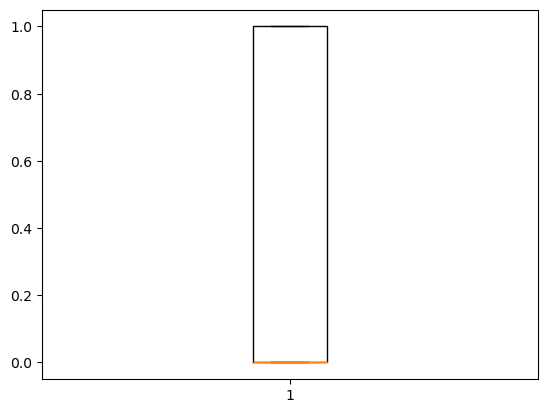

In [172]:
plt.boxplot(oo.Survived);
#No outliers are present in this col

In [173]:
oo.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


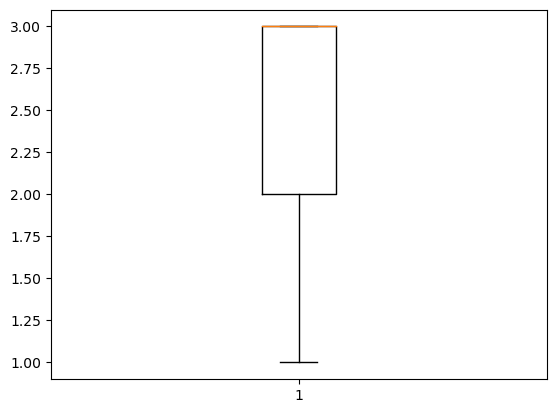

In [174]:
plt.boxplot(oo.Pclass);
#No outlier is present in this col

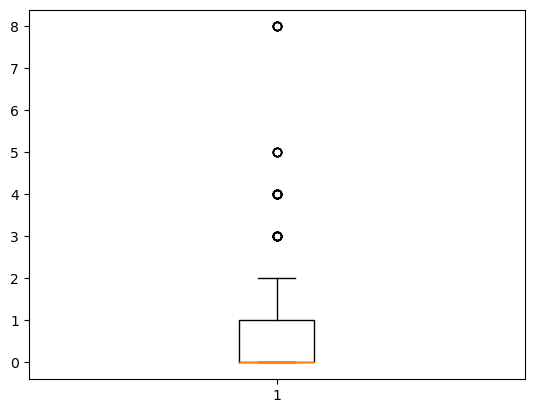

In [175]:
plt.boxplot(oo.SibSp);

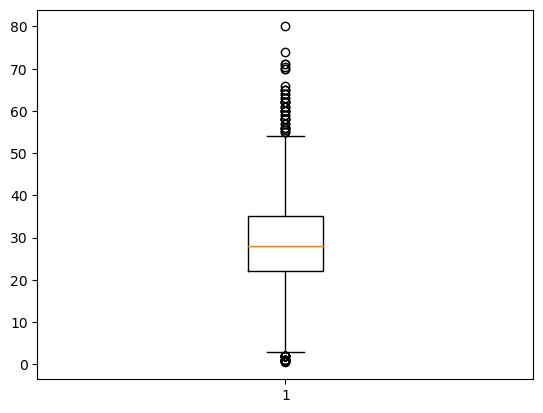

In [176]:
plt.boxplot(oo.Age);

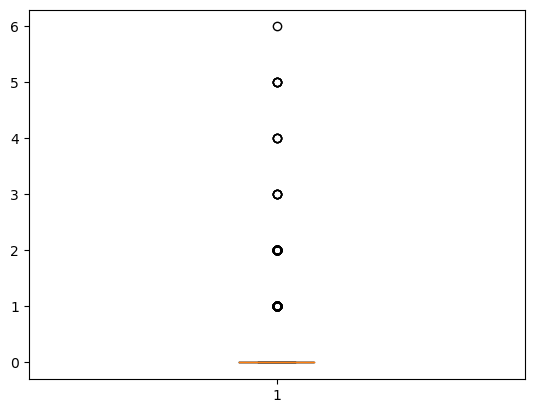

In [177]:
plt.boxplot(oo.Parch);

### Outlier Handling for SibSp, Age and Parch columns 

### Removing outliers of SibSp

In [178]:
Q1 = np.percentile(oo.SibSp,25,interpolation='midpoint')
Q2 = np.percentile(oo.SibSp,50,interpolation='midpoint')
Q3 = np.percentile(oo.SibSp,75,interpolation='midpoint')
Q1, Q2, Q3

(0.0, 0.0, 1.0)

In [179]:
IQR = Q3-Q1
IQR

1.0

In [180]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
low_limit, up_limit

(-1.5, 2.5)

In [181]:
outlier1 = []
for x in oo.SibSp:
    if(x>up_limit):
        outlier1.append(x)
outlier1

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [182]:
outlier1 = []
for x in oo.SibSp:
    if(x<low_limit):
        outlier1.append(x)
outlier1
#No outliers in lower limit

[]

In [183]:
oo.drop(oo[oo.SibSp > up_limit].index, inplace=True)

### Removing outliers of Parch column

In [185]:
Q1 = np.percentile(oo.Parch,25,interpolation='midpoint')
Q2 = np.percentile(oo.Parch,50,interpolation='midpoint')
Q3 = np.percentile(oo.Parch,75,interpolation='midpoint')
Q1, Q2, Q3

(0.0, 0.0, 0.0)

In [186]:
IQR = Q3-Q1
IQR

0.0

In [187]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
low_limit, up_limit

(0.0, 0.0)

In [192]:
oo.drop(oo[oo.Parch > up_limit].index, inplace=True)

### Removing outliers in Age column

In [203]:
Q1 = np.percentile(oo.Age,25,interpolation='midpoint')
Q2 = np.percentile(oo.Age,50,interpolation='midpoint')
Q3 = np.percentile(oo.Age,75,interpolation='midpoint')
Q1, Q2, Q3

(25.0, 28.0, 35.0)

In [204]:
IQR = Q3-Q1
IQR

10.0

In [205]:
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
low_limit, up_limit

(10.0, 50.0)

In [206]:
outlier1 = []
for x in oo.Age:
    if(x<low_limit):
        outlier1.append(x)
outlier1

[5.0]

In [207]:
outlier1 = []
for x in oo.Age:
    if(x>up_limit):
        outlier1.append(x)
outlier1

[54.0,
 58.0,
 55.0,
 66.0,
 59.0,
 71.0,
 70.5,
 51.0,
 55.5,
 61.0,
 56.0,
 58.0,
 51.0,
 59.0,
 54.0,
 62.0,
 63.0,
 65.0,
 54.0,
 61.0,
 60.0,
 51.0,
 52.0,
 65.0,
 56.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 54.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 52.0,
 61.0,
 57.0,
 80.0,
 51.0,
 56.0,
 70.0,
 60.0,
 52.0,
 52.0,
 51.0,
 57.0,
 62.0,
 74.0,
 51.0]

In [208]:
oo.drop(oo[oo.Age > up_limit].index, inplace=True)

In [209]:
oo.drop(oo[oo.Age < low_limit].index, inplace=True)

In [211]:
oo.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


### Min Max Scaling of numerical columns

In [222]:
oo1 = oo

In [223]:
oo1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,624.000000,624.000000,624.000000,624.000000,624.0,624.000000
mean,0.341346,2.375000,28.988782,0.233974,0.0,25.170979
std,0.474542,0.817397,7.923432,0.477150,0.0,42.912592
min,0.000000,1.000000,11.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.0,7.847950
50%,0.000000,3.000000,28.000000,0.000000,0.0,9.543750
75%,1.000000,3.000000,32.000000,0.000000,0.0,26.000000
max,1.000000,3.000000,50.000000,2.000000,0.0,512.329200


In [224]:
oo1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [225]:
X = oo1.drop(['Name','Sex','Ticket','Fare', 'Cabin', 'Embarked'],axis=1)
#MinMax Scaling is performed on numerical columns

In [226]:
X.head()

,Survived,Pclass,Age,SibSp,Parch
PassengerId,,,,,
1,0,3,22.0,1,0
2,1,1,38.0,1,0
3,1,3,26.0,0,0
4,1,1,35.0,1,0
5,0,3,35.0,0,0


In [228]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
X1 = minmax.fit_transform(X)

In [229]:
X1 = pd.DataFrame(X1, columns = ['Survived', 'Pclass','Age', 'SibSp', 'Parch'])
X1.describe()

,Survived,Pclass,Age,SibSp,Parch
count,624.000000,624.000000,624.000000,624.000000,624.0
mean,0.341346,0.687500,0.461251,0.116987,0.0
std,0.474542,0.408699,0.203165,0.238575,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.500000,0.333333,0.000000,0.0
50%,0.000000,1.000000,0.435897,0.000000,0.0
75%,1.000000,1.000000,0.538462,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0
